# Random Forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("../df_postprocessing_unscaled.csv")
df_2021 = pd.read_csv("../df_2021_postprocessing_unscaled.csv")
df.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,team_William & Mary,team_Winston Salem St.,team_Winthrop,team_Wisconsin,team_Wofford,team_Wright St.,team_Wyoming,team_Xavier,team_Yale,team_Youngstown St.
0,32,64.0,108.3,18.1,53.0,53.33,2.3,5.9,14.6,14.1,...,0,0,0,0,0,0,0,0,0,0
1,11,1.0,121.1,16.8,75.0,75.00,0.0,0.0,15.8,24.8,...,0,0,0,0,0,0,0,0,0,0
2,27,81.8,99.8,27.7,49.9,53.76,6.9,17.6,15.6,18.6,...,0,0,0,0,0,0,0,0,0,0
3,35,76.2,118.1,16.4,58.8,60.93,4.7,11.5,12.3,15.1,...,0,0,0,0,0,0,0,0,0,0
4,29,9.5,60.7,6.9,8.3,14.93,3.2,13.9,7.7,6.1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.columns[:80]

Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
       'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA',
       'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr',
       'num', 'porpag', 'adjoe', 'pfr', 'pid', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops',
       'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb',
       'treb', 'ast', 'stl', 'blk', 'pts', 'round', 'round_1_pick',
       'overall_pick', 'first_round_drafted', 'second_round_drafted',
       'role_Combo G', 'role_PF/C', 'role_Pure PG', 'role_Scoring PG',
       'role_Stretch 4', 'role_Wing F', 'role_Wing G', 'ht_month_Jul',
       'ht_month_Jun', 'ht_month_May', 'ht_day_1', 'ht_day_10', 'ht_day_11',
       'ht_day_2', 'ht_day_3', 'ht_day_4', 'ht_day_5', 'ht_da

In [28]:
df[['round', 'round_1_pick',
       'overall_pick', 'first_round_drafted', 'second_round_drafted']].describe()

,round,round_1_pick,overall_pick,first_round_drafted,second_round_drafted
count,49756.000000,49756.000000,49756.000000,49756.000000,49756.000000
mean,0.014631,0.152404,0.292889,0.005266,0.004683
std,0.154219,1.745415,3.388681,0.072375,0.068272
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,30.000000,60.000000,1.000000,1.000000


In [29]:
X_train = df.drop(['round', 'round_1_pick', 'overall_pick', 
            'first_round_drafted', 'second_round_drafted'], axis=1)
y_train = df['first_round_drafted']

In [30]:
sum(y_train)

262

In [31]:
X_test = df_2021.drop(['round', 'round_1_pick', 'overall_pick', 
            'first_round_drafted', 'second_round_drafted'], axis=1)
y_test = df_2021['first_round_drafted']

In [32]:
sum(y_test)

23

In [7]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

CV_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='roc_auc')
CV_rf.fit(X_train, y_train)
best_rf = CV_rf.best_estimator_

/Users/tommasosalvatori/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tommasosalvatori/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tommasosalvatori/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/tommasosalvatori/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    

ROC-AUC Score: 0.9955191638288038
Precision: 1.0
Recall: 0.043478260869565216
F1 Score: 0.08333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4609
           1       1.00      0.04      0.08        23

    accuracy                           1.00      4632
   macro avg       1.00      0.52      0.54      4632
weighted avg       1.00      1.00      0.99      4632

Confusion Matrix:
[[4609    0]
 [  22    1]]


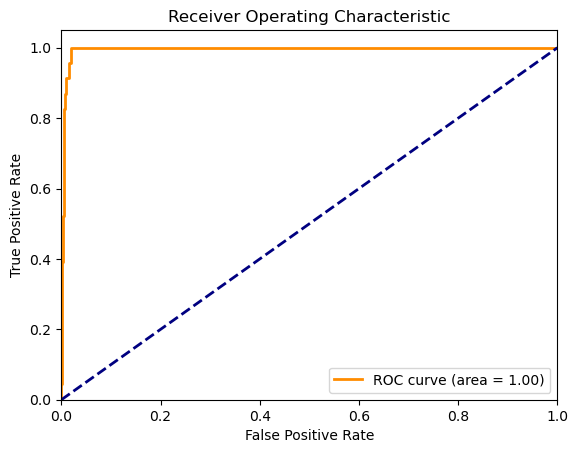

In [37]:
# Evaluate the model
pred = best_rf.predict_proba(X_test)[:,1]
y_pred = best_rf.predict(X_test)

auc = roc_auc_score(y_test, pred)
print(f"ROC-AUC Score: {auc}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, pred):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [38]:
def find_best_threshold(y_true, y_prob):
    best_threshold = 0.5
    best_score = 0
    for threshold in np.arange(0.1, 0.9, 0.001):
        score = f1_score(y_true, y_prob >= threshold)
        if score > best_score:
            best_score = score
            best_threshold = threshold
    return best_threshold, best_score

In [40]:
best_threshold, best_score = find_best_threshold(y_test, pred)
print(best_threshold)
print(best_score)

0.1
0.5084745762711865


In [36]:
pred_df = pd.DataFrame(pred)
pred_df.columns = ['pred']

# df_2021 = df_2021.reset_index()

merged_df = df_2021.merge(pred_df, left_index=True, right_index=True)

selected_by_model = merged_df.sort_values('pred', ascending=False).head(23)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
0    14
1     9
Name: count, dtype: int64

In [42]:
selected_by_model_2 = merged_df.sort_values('pred', ascending=False).iloc[23:46]
selected_by_model_2.second_round_drafted.value_counts()

second_round_drafted
0    18
1     5
Name: count, dtype: int64

In [11]:
merged_df.sort_values('pred', ascending=False)[['pred', 'first_round_drafted']]

,pred,first_round_drafted
3745,0.605180,1
773,0.385306,0
608,0.384032,1
2429,0.368869,1
1759,0.311258,0
...,...,...
1982,0.000000,0
1983,0.000000,0
1984,0.000000,0
1985,0.000000,0


# Compute Basline

## Use last year's top scorers

In [51]:
top_scorers_first = df_2021.sort_values('pts', ascending=False).head(32)
sum(top_scorers_first['first_round_drafted'])

2

In [52]:
top_scorers = df_2021.sort_values('pts', ascending=False).head(64)
sum(top_scorers['first_round_drafted'])

4

## Use mock draft predictions

In [58]:
draft_players = pd.read_csv("data/draft_players.csv")

In [62]:
draft_players.drop("Unnamed: 0", axis=1)

,player_name,team,affiliation,year,round,round_pick,overall_pick
0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1
1,Jalen Green,Houston Rockets,Ignite (G League),2021.0,1,2,2
2,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3
3,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4
4,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5
5,Josh Giddey,Oklahoma City Thunder,NBA Global Academy (Australia),2021.0,1,6,6
6,Jonathan Kuminga,Golden State Warriors,Ignite (G League),2021.0,1,7,7
7,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8
8,Davion Mitchell,Sacramento Kings,Baylor,2021.0,1,9,9
9,Ziaire Williams,New Orleans Pelicans,Stanford,2021.0,1,10,10
